
#        FI505E - Coding and Data Science for Finance           
#####                                        Autumn 2025
######                                      Stocks  Algorithm Trading

Group Project :                                             
##   Algorithm Trading
##  Use Machine Learning Techniques to trade stocks


In this lab exercise, we work on the problem of predicting a buy or sell signal for a trading strategy in the classification framework. The predicted variable has a value of 1 for buy and 0 for sell. The buy or sell signal are decided on the basis on the comparison of short term vs. long term price.

### Please submit your solution to this lab excercise.

The goal of this case study is tu use classification based models to predict whether the current signal is **buy or sell** depending on the short term vs long term price.


For this task, you need to pick a stock symbole in the market,accourding to your group number, and forecast to forecast stock prcie.


##Students name 	  Student No.	      
#### 1. Changtai KE           20240308
#### 2. Dharmateja PONNAM     20240308
#### 3. Moulya ERAIAHSWAMY    20240307
#### 4. Pooja LINGANNA        20240312


##Class:FI505E
##Group:GR01

##To hand in
###Guidelines for report layout



 Report your results with Python code in this nootbook file. Please explain the result in details. Reporting codes and graphs without explainations is not enough.
•	You need to explain results and graphs, just graphs cannot be considered as grading
•	Name your report: ClassNo_GroupNo, upload word format file to Turnitin on Moodle.
•	The assignment counts for 20% of the module grade.
•	The Rennes School of Business policy is to not give grades for continuous assessment during the term, so you will only receive your grade when you get the overall module grade.

#Deadline for reporting is one week

##Grading

The project will be graded from zero to 100, and a minimum of 55 points are required to pass the project. Higher scores will yield higher grades. The clarity and quality of motivations and comments play an important role in the grading.

##Plagiarism Warning
Plagiarism is defined as direct copying of textual material of other people’s work, and presenting them as one’s own without acknowledgement.
No student shall represent the work of another person as his own in any academic assignment.
Plagiarism is a very serious offence. There are clear university rules as well as severe penalties for plagiarism at Rennes School of Business.

Plagiarism Declaration

We, Group 4, hereby declare that I created this piece of work by myself, only with the sources stated above and without further aid. I consent to a plagiarism check of this work by conventional and electronic means (digitalization and automatized check by software).


--------------------------------------                                     -------------------------
Place, Rennes date  10/11/2025



You can watch this video about Introduction to Algorithmic Trading Using Python - How to Create & Test Trading Algorithm
https://www.youtube.com/watch?v=fqltiq5EahU

### Downloading the Data

In [1]:
!pip install yfinance matplotlib

Step 1: ASk AI

give me code to downlaod price of Amazon from yahoo finance and plot time series of price

/tmp/ipython-input-3563794271.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


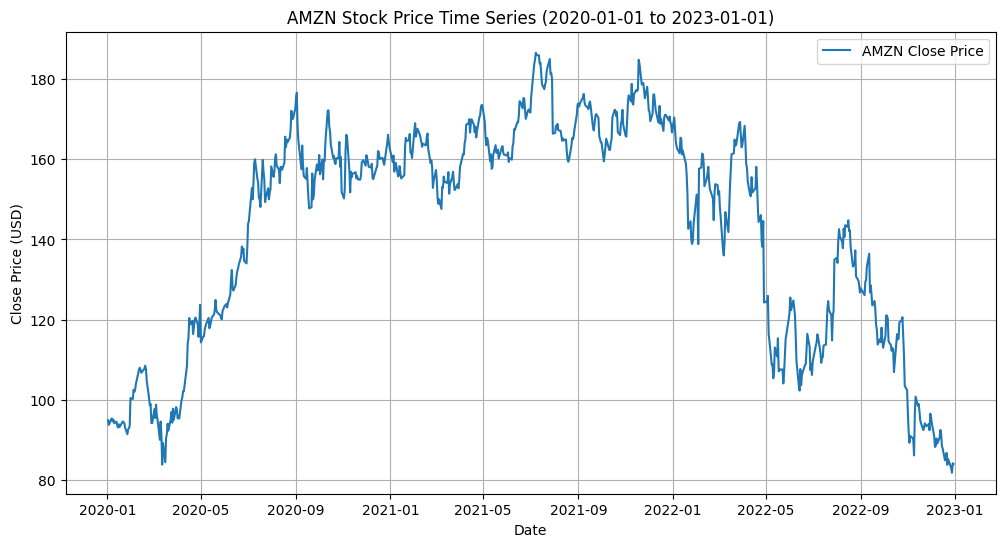

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol and time period
symbol = "AMZN"  # Amazon Inc.
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Plot the time series of the Close price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f'{symbol} Close Price')
plt.title(f'{symbol} Stock Price Time Series ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

Select a symbol accourding to your group number for this link and replace with Apple symbol

https://bit.ly/2IK70kN

You can also use thses symbols:

* Group.   Symbol | Company
1.   PFE | Pfizer
2.   AMZN | Amazon.com
1.   NFLX | Netflix Inc
1.   DAL | Delta Air Line
1.   BA | Boeing Co
2.   C | Citigroup Inc

Optional Symbols:
1.   BNTX | BioNTech SE - ADR
2.   ZM | Zoom Video Communications Inc
1.   MRNA | Moderna therapeutics
3.  BTC-USD |  Bitcoin USD

Step 2: ASK AI

Calculate short and long moving average of Close price and plot them

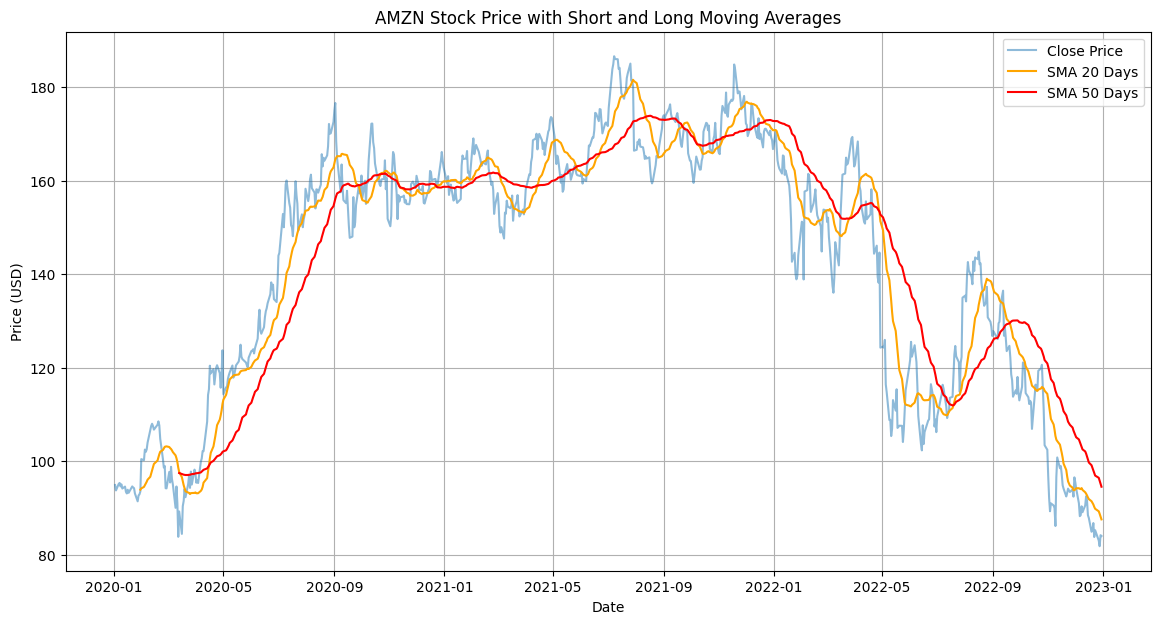

In [3]:
import matplotlib.pyplot as plt

# Define short and long moving average windows
short_window = 20  # e.g., 20 days
long_window = 50   # e.g., 50 days

# Calculate Short Moving Average (SMA)
data['SMA_Short'] = data['Close'].rolling(window=short_window).mean()

# Calculate Long Moving Average (LMA)
data['SMA_Long'] = data['Close'].rolling(window=long_window).mean()

# Plot the Close price along with the moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_Short'], label=f'SMA {short_window} Days', color='orange')
plt.plot(data['SMA_Long'], label=f'SMA {long_window} Days', color='red')
plt.title(f'{symbol} Stock Price with Short and Long Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

###  Preparing the data for classification


A label to each movement:
* **1** if the signal is that short term price will go up as compared to the long term.
* **0** if the signal is that short term price will go down as compared to the long term.

Step 3: ASk AI

Create a binary signal when the short moving average is above long moving average and Plot the binary signal as a step plot

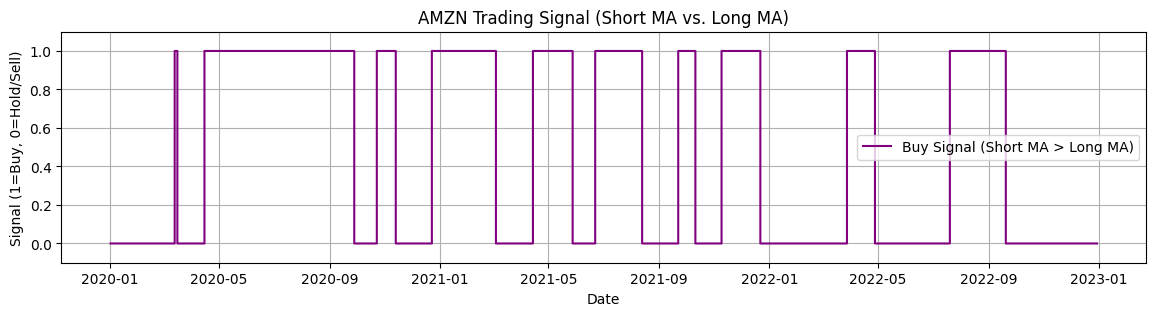

In [4]:
# Create a binary signal: 1 if short MA > long MA, 0 otherwise
data['Signal'] = 0
data.loc[data['SMA_Short'] > data['SMA_Long'], 'Signal'] = 1

# Plot the binary signal as a step plot
plt.figure(figsize=(14, 3))
plt.step(data.index, data['Signal'], where='post', label='Buy Signal (Short MA > Long MA)', color='purple')
plt.title(f'{symbol} Trading Signal (Short MA vs. Long MA)')
plt.xlabel('Date')
plt.ylabel('Signal (1=Buy, 0=Hold/Sell)')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1) # To ensure the 0 and 1 signals are clearly visible
plt.show()

Step 4: ASk from ChatGPT

calculate Moving Average, Stochastic Oscillator and Rate Of Change of price

In [5]:
import numpy as np
import pandas as pd # Ensure pandas is imported

# Helper function to get a Series from a potentially single-column DataFrame
def get_series_from_df(df, col_name):
    if col_name in df.columns:
        series_or_df = df[col_name]
        if isinstance(series_or_df, pd.DataFrame) and series_or_df.shape[1] == 1:
            return series_or_df.squeeze() # Convert single-column DataFrame to Series
        return series_or_df
    return pd.Series(dtype='float64') # Return empty Series if column not found

# Get the price Series, ensuring they are Series
close_price = get_series_from_df(data, 'Close')
low_price = get_series_from_df(data, 'Low')
high_price = get_series_from_df(data, 'High')

# --- Moving Average (SMA_Short and SMA_Long are already calculated) ---
# The existing SMA_Short and SMA_Long columns are already correctly in the 'data' DataFrame.
# If a different MA is desired, it can be calculated here using `close_price` Series.

# --- Stochastic Oscillator ---
# %K = ((Current Close - Lowest Low) / (Highest High - Lowest Low)) * 100
# %D = 3-day SMA of %K

period_stochastic = 14

# Calculate Low_14 and High_14 based on the Series
data['Low_14'] = low_price.rolling(window=period_stochastic).min()
data['High_14'] = high_price.rolling(window=period_stochastic).max()

# Calculate %K using the Series. Handle potential division by zero.
numerator_k = close_price - data['Low_14']
denominator_k = data['High_14'] - data['Low_14']
# Replace 0s in the denominator with NaN to avoid division by zero warnings/errors
denominator_k = denominator_k.replace(0, np.nan)
data['%K'] = (numerator_k / denominator_k) * 100
data['%D'] = data['%K'].rolling(window=3).mean()

# --- Rate Of Change (ROC) ---
# ROC = ((Current Close - Close n periods ago) / Close n periods ago) * 100

period_roc = 12
# Handle potential division by zero for ROC
denominator_roc = close_price.shift(period_roc)
denominator_roc = denominator_roc.replace(0, np.nan)
data['ROC'] = ((close_price - denominator_roc) / denominator_roc) * 100

print("Calculated technical indicators for {}:".format(symbol))
# Ensure to select only existing columns for tail, as some might have NaNs initially
cols_to_print = ['Close', 'SMA_Short', 'SMA_Long', '%K', '%D', 'ROC']
existing_cols = [col for col in cols_to_print if col in data.columns]
print(data[existing_cols].tail())

Calculated technical indicators for AMZN:
Price           Close  SMA_Short SMA_Long         %K         %D       ROC
Ticker           AMZN                                                    
Date                                                                     
2022-12-23  85.250000  89.827499  96.9226  21.428571  17.632779 -3.628758
2022-12-27  83.040001  89.282000  96.4454   5.642864  12.690481 -8.090756
2022-12-28  81.820000  88.752000  95.8060   0.892838   9.321425 -8.160284
2022-12-29  84.180000  88.134000  95.1624  17.101637   7.879113 -7.034790
2022-12-30  84.000000  87.559000  94.5410  15.865371  11.286615 -9.179369


We begin by the constructing a dataset that contains the predictors which will be used to make the predictions, and the output variable.

The current Data of the bicoin consists of date, open, high, low, close and Volume. Using this data we calculate the following  technical indicators:
* **Moving Average** : A moving average provides an indication of the trend of the price movement by cut down the amount of "noise" on a price chart.
* **Stochastic Oscillator %K and %D** : A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.
* **Relative Strength Index(RSI)** :It is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.
* **Rate Of Change(ROC)**: It is a momentum oscillator, which measures the percentage change between the current price and the n period past price.
* **Momentum (MOM)** : It is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing.

#### Detais of momentum indicators
Using this data, we calculate the following momentum indicators:

### Moving average
A moving average provides an indication of a price trend by cutting down the
amount of noise in the series.

### Stochastic oscillator %K
A stochastic oscillator is a momentum indicator that compares the closing price
of a security to a range of its previous prices over a certain period of time. %K and %D are slow and fast indicators. The fast indicator is more sensitive than the slow indicator to changes in the price of the underlying security and will likely result in many transaction signals.

###  Relative strength index (RSI)
This is a momentum indicator that measures the magnitude of recent price
changes to evaluate overbought or oversold conditions in the price of a stock or
other asset. The RSI ranges from 0 to 100. An asset is deemed to be overbought
once the RSI approaches 70, meaning that the asset may be getting overvalued
and is a good candidate for a pullback. Likewise, if the RSI approaches 30, it is an indication that the asset may be getting oversold and is therefore likely to become undervalued.

###  Rate of change (ROC)
This is a momentum oscillator that measures the percentage change between the
current price and the n period past prices. Assets with higher ROC values are
considered more likely to be overbought; those with lower ROC, more likely to
be oversold.

### Train Test Split

Step 5: ASk from ChatGPT

use  binary signal as dependent and 1-5 lag information of Moving Average, Stochastic Oscillator and Rate Of Change of price as predictors and create time series splitting training and test sets based on time 80% for training set with TimeSeriesSplit

In [6]:
import numpy as np
import pandas as pd # Ensure pandas is imported
from sklearn.model_selection import TimeSeriesSplit

# --- Defensive copy to prevent SettingWithCopyWarning issues ---
# Ensure we are always working on a fresh copy of the DataFrame
data = data.copy()

# --- Start of Column Name Standardization ---
current_columns = data.columns.tolist()
renaming_map = {}

# Handle yfinance MultiIndex columns and specific ticker suffixes
# Assuming default yfinance behavior where ('Close', 'AAPL') or ('Close', '') might exist
if isinstance(data.columns, pd.MultiIndex):
    new_cols = []
    for col in data.columns:
        if isinstance(col, tuple):
            # Take the first level if the second is the ticker, or just the first if it's generic
            if col[1] and col[1] != '': # e.g., ('Close', 'AAPL') -> 'Close'
                new_cols.append(col[0])
            else: # e.g., ('SMA_Short', '') -> 'SMA_Short'
                new_cols.append(col[0])
        else:
            new_cols.append(col)
    data.columns = new_cols
    current_columns = data.columns.tolist()

# Rename primary price columns if they still have a ticker suffix (e.g., 'Close_NFLX' to 'Close')
for col in current_columns:
    # Check if a column has the symbol suffix and renaming it would not create duplicates
    if symbol in col and col.replace(f'_{symbol}', '') not in data.columns:
        renaming_map[col] = col.replace(f'_{symbol}', '')

# Apply renaming if any changes are needed
if renaming_map:
    data.rename(columns=renaming_map, inplace=True)
    current_columns = data.columns.tolist() # Update after renaming

# Remove any trailing underscores from indicators (e.g., 'SMA_Short_' to 'SMA_Short')
for col in current_columns:
    if col.endswith('_') and col.strip('_') not in data.columns:
        data.rename(columns={col: col.strip('_')}, inplace=True)
# --- End of Column Name Standardization ---

# --- Ensure core indicators exist, re-calculate if necessary ---
# Define short and long moving average windows (from cell tFp2vPze9_B6)
short_window = 20
long_window = 50

# Recalculate SMA_Short and SMA_Long if missing or potentially corrupted
if 'Close' in data.columns:
    data['SMA_Short'] = data['Close'].rolling(window=short_window).mean()
    data['SMA_Long'] = data['Close'].rolling(window=long_window).mean()
else:
    raise ValueError("'Close' price column not found. Cannot calculate moving averages.")

# Recalculate %K, %D, ROC if any are missing, ensuring 'Close', 'Low', 'High' exist
required_price_cols = ['Close', 'Low', 'High']
if all(col in data.columns for col in required_price_cols):
    # Helper function to get a Series
    def get_series_from_df(df, col_name):
        if col_name in df.columns:
            return df[col_name].squeeze() # Ensure it's a Series
        return pd.Series(dtype='float64')

    close_price = get_series_from_df(data, 'Close')
    low_price = get_series_from_df(data, 'Low')
    high_price = get_series_from_df(data, 'High')

    period_stochastic = 14
    data['Low_14'] = low_price.rolling(window=period_stochastic).min()
    data['High_14'] = high_price.rolling(window=period_stochastic).max()
    numerator_k = close_price - data['Low_14']
    denominator_k = data['High_14'] - data['Low_14']
    denominator_k = denominator_k.replace(0, np.nan)
    data['%K'] = (numerator_k / denominator_k) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

    period_roc = 12
    denominator_roc = close_price.shift(period_roc)
    denominator_roc = denominator_roc.replace(0, np.nan)
    data['ROC'] = ((close_price - denominator_roc) / denominator_roc) * 100
else:
    print("Warning: Not all price columns (Close, Low, High) available to calculate %K, %D, and ROC.")

# --- End of indicator re-calculation ---

# Define the base features to be lagged - assuming standard names are now correctly set
base_features = ['SMA_Short', 'SMA_Long', '%K', '%D', 'ROC']

# --- Robust 'Signal' column creation ---
# Remove any existing 'Signal' columns to ensure a clean start for the new Series
signal_cols_in_data = [col for col in data.columns if 'Signal' in str(col)]
if signal_cols_in_data:
    data.drop(columns=signal_cols_in_data, errors='ignore', inplace=True)

# Now, create the 'Signal' column as a single, 1D Series
if 'SMA_Short' in data.columns and 'SMA_Long' in data.columns:
    data['Signal'] = pd.Series(0, index=data.index, dtype=int)
    # Use .loc for assignment to explicitly modify the DataFrame and avoid warnings
    data.loc[data['SMA_Short'] > data['SMA_Long'], 'Signal'] = 1
    print("'Signal' column successfully created based on SMA_Short and SMA_Long.")
else:
    raise ValueError("Cannot create 'Signal' column because 'SMA_Short' or 'SMA_Long' are missing.")
# --- End of 'Signal' column creation ---


# Create lagged features for the predictors
predictive_features = []
for feature in base_features:
    if feature in data.columns: # Only create lags for features that actually exist
        for i in range(1, 6): # Lags from 1 to 5
            lag_col_name = f'{feature}_Lag_{i}'
            # Use .loc to assign, ensuring modifications stick to the DataFrame
            data.loc[:, lag_col_name] = data[feature].shift(i)
            predictive_features.append(lag_col_name)
    else:
        print(f"Skipping lag creation for '{feature}' as it's not in the DataFrame.")

# Filter X_cols to only include columns that actually exist in the DataFrame after lagging
X_cols = [col for col in predictive_features if col in data.columns]

# Final check for 'Signal' column validity before dropping NaNs
if 'Signal' not in data.columns or data['Signal'].empty or data['Signal'].isnull().all():
    raise ValueError("The 'Signal' column is missing, empty, or entirely NaN and is required for data splitting.")

# Drop rows with NaN values that result from lagging or initial indicator calculations
# Only consider columns that are part of X_cols or the 'Signal' itself for subset
subset_for_dropna = [col for col in X_cols + ['Signal'] if col in data.columns]
if not subset_for_dropna:
    raise ValueError("No valid columns to form predictors or target after cleaning.")

data_cleaned = data.dropna(subset=subset_for_dropna)

# Define X (predictors) and y (dependent variable)
X = data_cleaned[X_cols]
y = data_cleaned['Signal'].squeeze() # Ensure y is a 1D Series

# Perform a time-based split for training and testing (80% for training, 20% for testing)
split_point = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:] # y_train and y_test will now be 1D Series

# Store y_test as a 1D Series explicitly for use in subsequent cells (like ROC plotting)
y_test_1d = y_test.copy() # Make a copy to prevent potential SettingWithCopyWarning

print(f"Total data points after dropping NaNs: {len(X)}")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print("\nFirst 5 rows of X_train (predictors):\n", X_train.head())
print("\nFirst 5 rows of y_train (signal):\n", y_train.head())

'Signal' column successfully created based on SMA_Short and SMA_Long.
Total data points after dropping NaNs: 702
Training set size: 561
Test set size: 141

First 5 rows of X_train (predictors):
             SMA_Short_Lag_1  SMA_Short_Lag_2  SMA_Short_Lag_3  \
Date                                                            
2020-03-20        94.180875        94.861300        95.711850   
2020-03-23        93.556174        94.180875        94.861300   
2020-03-24        93.290025        93.556174        94.180875   
2020-03-25        93.208424        93.290025        93.556174   
2020-03-26        92.974049        93.208424        93.290025   

            SMA_Short_Lag_4  SMA_Short_Lag_5  SMA_Long_Lag_1  SMA_Long_Lag_2  \
Date                                                                           
2020-03-20        96.581425        97.695725       97.090310       97.116240   
2020-03-23        95.711850        96.581425       97.044429       97.090310   
2020-03-24        94.861300  

### Decision Tree

Step 6: ASk AI

give me code for decision tree with above traning and test sets

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dtree_model = DecisionTreeClassifier(random_state=42)

# Train the model
dtree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree = dtree_model.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Test Accuracy: {accuracy_dtree:.4f}")

Decision Tree Test Accuracy: 0.4823


Step 7: ASk AI


give me code for confusion matrix precision, recall,


Decision Tree Confusion Matrix:
[[37 61]
 [12 31]]


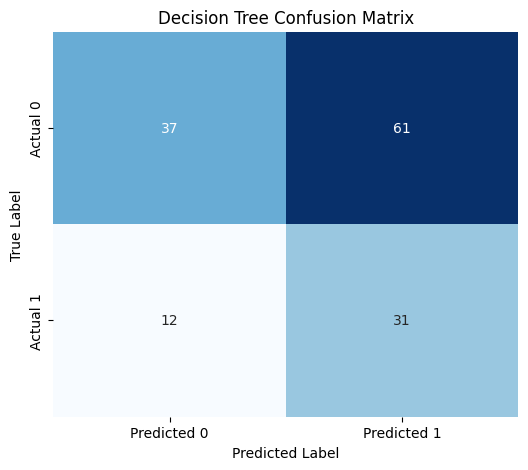


Decision Tree Precision: 0.3370
Decision Tree Recall: 0.7209
Decision Tree F1-Score: 0.4593

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.38      0.50        98
           1       0.34      0.72      0.46        43

    accuracy                           0.48       141
   macro avg       0.55      0.55      0.48       141
weighted avg       0.63      0.48      0.49       141



In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_test and y_pred_dtree are 1-dimensional for sklearn metrics
# Assuming 'Signal' is the relevant column in y_test DataFrame
# If y_test is a DataFrame with multiple 'Signal' columns, take the first one.
if isinstance(y_test, pd.DataFrame) and 'Signal' in y_test.columns:
    y_test_1d = y_test['Signal'].iloc[:, 0] if y_test['Signal'].ndim > 1 else y_test['Signal']
elif isinstance(y_test, pd.DataFrame) and y_test.shape[1] > 1:
    y_test_1d = y_test.iloc[:, 0].squeeze() # Take the first column if multiple are present
else:
    y_test_1d = y_test.squeeze() # Ensure it's a Series or 1D array

# Similarly, ensure y_pred_dtree is 1-dimensional
if y_pred_dtree.ndim > 1:
    y_pred_dtree_1d = y_pred_dtree[:, 0] # Take the first column if it's 2D
else:
    y_pred_dtree_1d = y_pred_dtree

# Calculate Confusion Matrix
cm_dtree = confusion_matrix(y_test_1d, y_pred_dtree_1d)
print("\nDecision Tree Confusion Matrix:")
print(cm_dtree)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate Precision, Recall, and F1-score
# Handle potential errors if no positive samples are predicted/actual for precision/recall
precision_dtree = precision_score(y_test_1d, y_pred_dtree_1d, zero_division=0)
recall_dtree = recall_score(y_test_1d, y_pred_dtree_1d, zero_division=0)
f1_dtree = f1_score(y_test_1d, y_pred_dtree_1d, zero_division=0)

print(f"\nDecision Tree Precision: {precision_dtree:.4f}")
print(f"Decision Tree Recall: {recall_dtree:.4f}")
print(f"Decision Tree F1-Score: {f1_dtree:.4f}")

# Print full classification report for more details
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_1d, y_pred_dtree_1d, zero_division=0))

ASk AI

Step 8: give me code for Evaluating the model with Confusion matrix, explain precision, recall,

In [9]:
# This cell is intentionally left blank as the request for evaluation code and explanation has been addressed in the previous turn.
# Please refer to the output of cell 2aet8ljxZtRP and the subsequent textual explanation.

ASk AI

Step 9: give me ROC plot

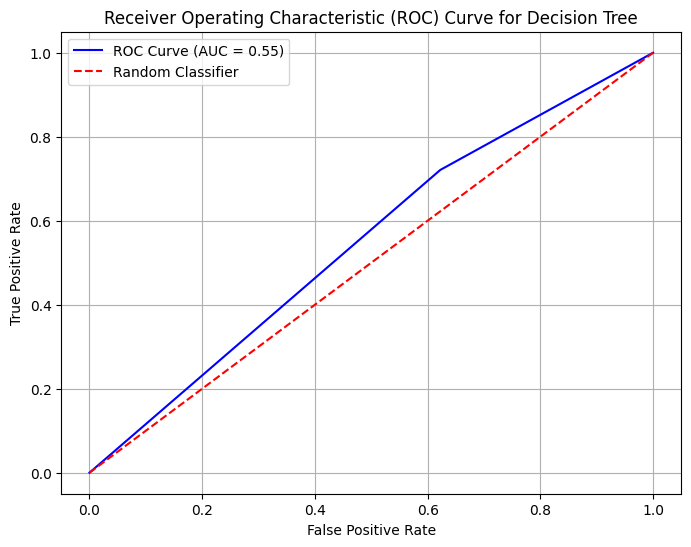

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume y_test_1d (1D Series) and dtree_model are available from previous cells.
# If y_test_1d is not defined, it means the data prep cell (fGOCCsITY_Yu) was not run correctly.
if 'y_test_1d' not in locals():
    raise ValueError("y_test_1d is not defined. Please ensure the data preparation cell (fGOCCsITY_Yu) and subsequent cells are run successfully.")

# Check if there are at least two unique classes in y_test_1d for ROC curve to be meaningful
unique_classes = np.unique(y_test_1d)
if len(unique_classes) < 2:
    print(f"Cannot plot ROC curve: Less than two unique classes present in y_test_1d. Unique classes: {unique_classes}")
else:
    # Get probability estimates for the positive class (class 1)
    proba_output = dtree_model.predict_proba(X_test)

    y_pred_proba_dtree = None
    if proba_output.ndim == 2 and proba_output.shape[1] == 2:
        # Standard case: (N, 2) array, take probabilities of the positive class (index 1)
        y_pred_proba_dtree = proba_output[:, 1]
    elif proba_output.ndim == 1: # If predict_proba returns a 1D array
        # This often happens if model learned to predict only one class.
        # Assuming these are probabilities for the positive class (label 1).
        if len(dtree_model.classes_) == 2 and dtree_model.classes_[1] == 1:
            y_pred_proba_dtree = proba_output
        else:
            print(f"Warning: predict_proba returned a 1D array, but model classes are not standard. Model classes: {dtree_model.classes_}")
    elif proba_output.ndim == 2 and proba_output.shape[1] == 1:
        # Case: (N, 1) array, implies probabilities for a single class.
        if len(dtree_model.classes_) == 2 and dtree_model.classes_[1] == 1:
            y_pred_proba_dtree = proba_output.flatten()
        else:
            print(f"Warning: predict_proba returned a (N,1) array, but model classes are not standard. Model classes: {dtree_model.classes_}")
    else:
        print(f"Cannot plot ROC curve: Unexpected predict_proba output shape: {proba_output.shape}")

    if y_pred_proba_dtree is not None and len(y_pred_proba_dtree) > 0:
        # Calculate ROC curve values
        fpr, tpr, thresholds = roc_curve(y_test_1d, y_pred_proba_dtree)

        # Calculate AUC (Area Under the Curve)
        auc_dtree = roc_auc_score(y_test_1d, y_pred_proba_dtree)

        # Plot the ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_dtree:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("ROC curve cannot be plotted because no valid probability predictions were obtained.")

Step 10: ASk AI

give visualization of decision tree

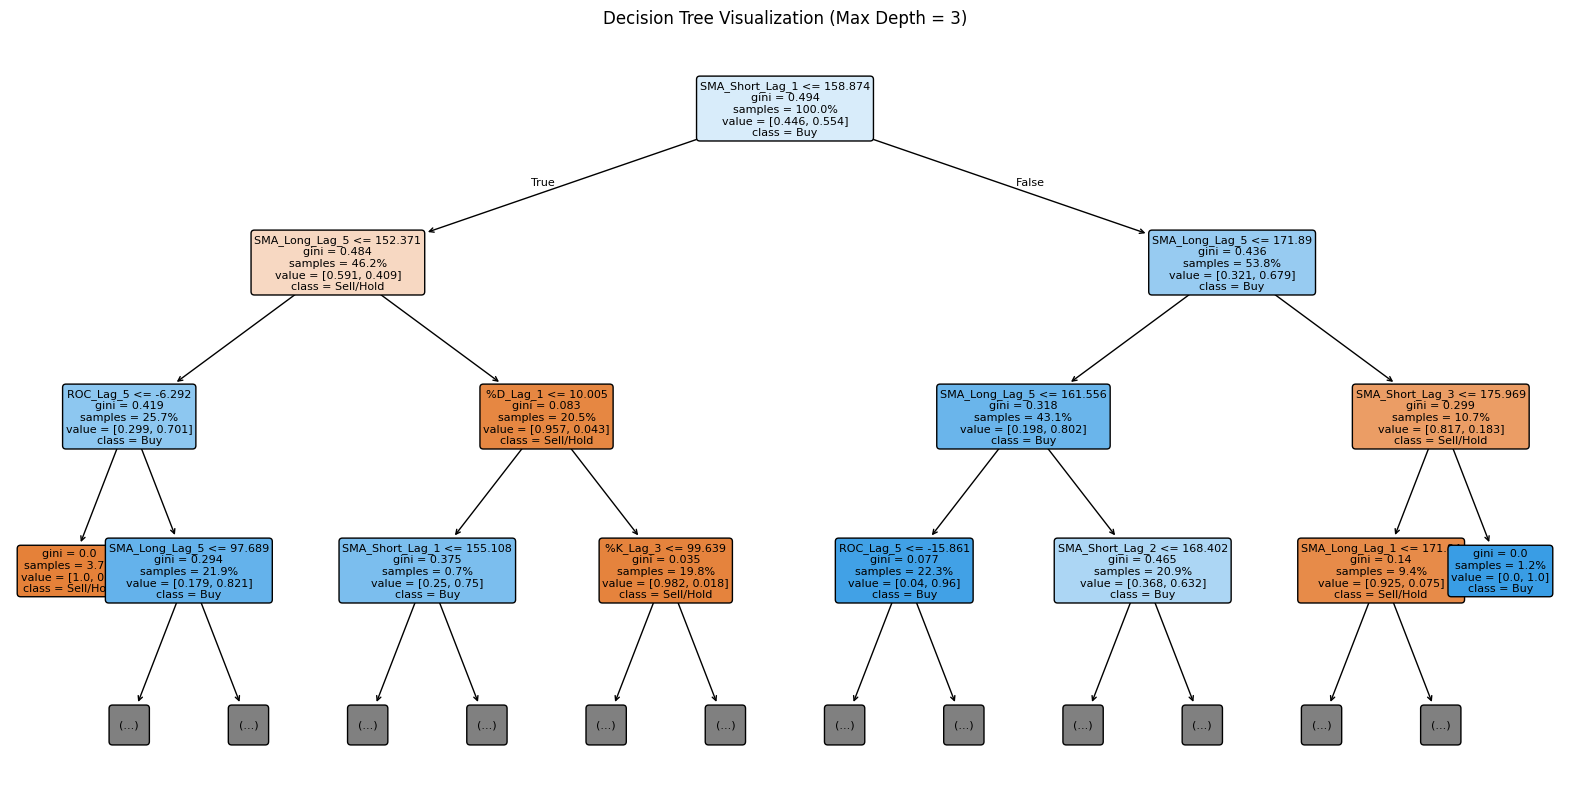

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10)) # Adjust figure size for better readability
plot_tree(dtree_model,
          feature_names=X_train.columns.tolist(),  # Use actual feature names
          class_names=['Sell/Hold', 'Buy'],  # Assuming 0 is Sell/Hold and 1 is Buy
          filled=True,
          rounded=True,
          proportion=True,
          max_depth=3, # Limit depth for better visualization, can be removed
          fontsize=8)
plt.title('Decision Tree Visualization (Max Depth = 3)')
plt.show()

### Random forest classifiers

Step 11: ASk AI
give me code for random forest  classifier model and plots importance variables

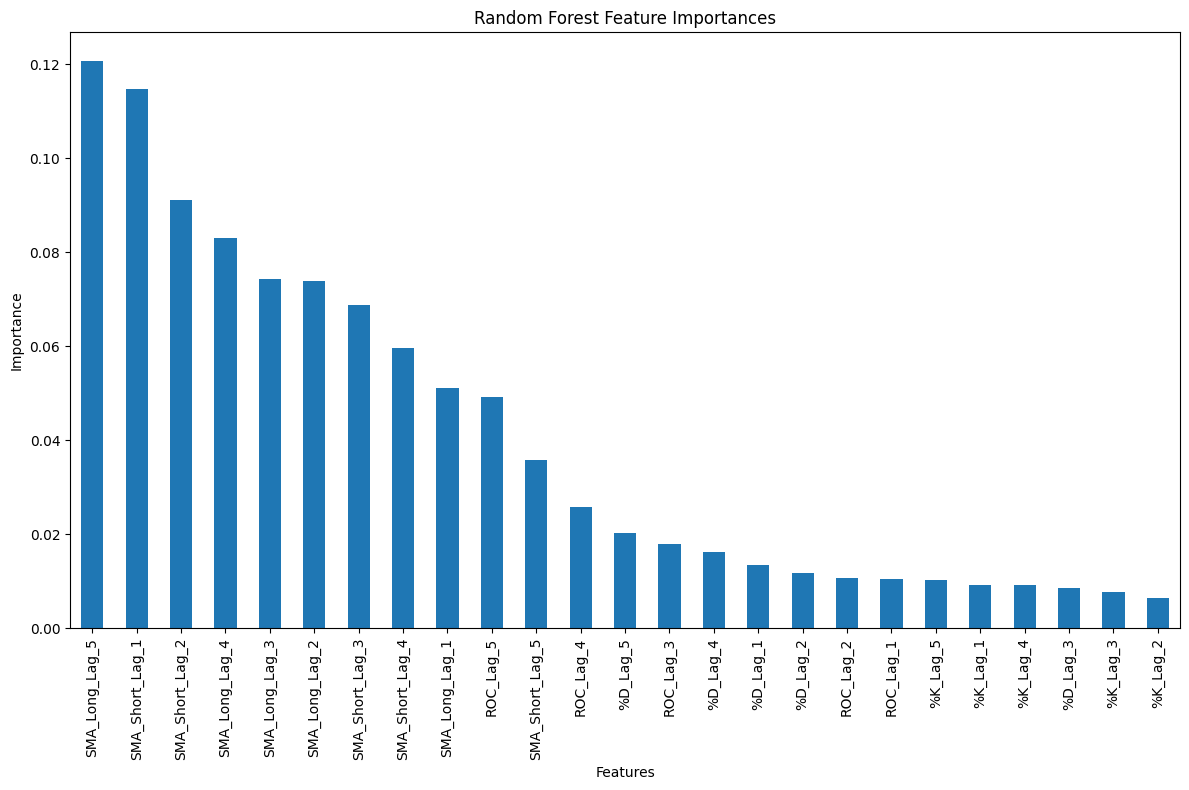

Top 10 most important features:
SMA_Long_Lag_5     0.120711
SMA_Short_Lag_1    0.114774
SMA_Short_Lag_2    0.091068
SMA_Long_Lag_4     0.083056
SMA_Long_Lag_3     0.074279
SMA_Long_Lag_2     0.073787
SMA_Short_Lag_3    0.068830
SMA_Short_Lag_4    0.059672
SMA_Long_Lag_1     0.051074
ROC_Lag_5          0.049123
dtype: float64


In [12]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the Random Forest Classifier
# Using some default parameters for demonstration, can be tuned later
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set (optional, but good for completeness)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model (optional, but good for completeness)
# from sklearn.metrics import accuracy_score
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a pandas Series for easy sorting and plotting
importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the importances in descending order
sorted_importances = importance_series.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sorted_importances.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("Top 10 most important features:")
print(sorted_importances.head(10))

Step 12: ASk AI
give me ROC plot of above model

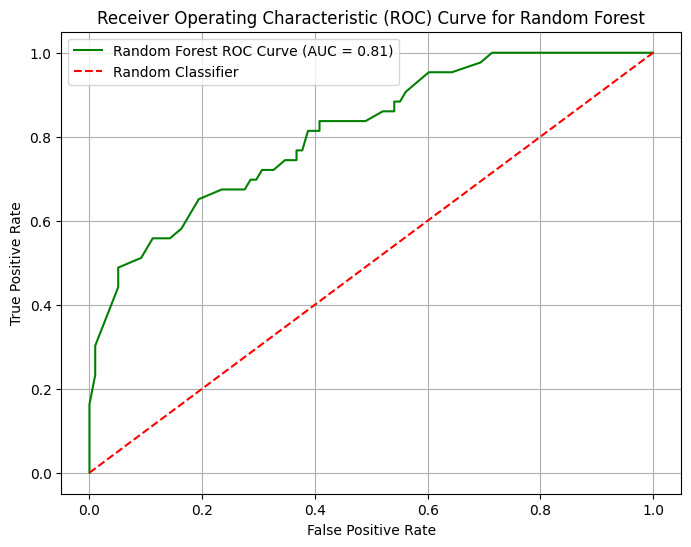

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Get probability estimates for the positive class (class 1) from the Random Forest model
# rf_model is the trained RandomForestClassifier from the previous cell.
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Check if there are at least two unique classes in y_test_1d for ROC curve to be meaningful
unique_classes_rf = np.unique(y_test_1d)
if len(unique_classes_rf) < 2:
    print(f"Cannot plot ROC curve for Random Forest: Less than two unique classes present in y_test_1d. Unique classes: {unique_classes_rf}")
else:
    # Calculate ROC curve values
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_1d, y_pred_proba_rf)

    # Calculate AUC (Area Under the Curve)
    auc_rf = roc_auc_score(y_test_1d, y_pred_proba_rf)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest ROC Curve (AUC = {auc_rf:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
    plt.legend()
    plt.grid(True)
    plt.show()

 Q1) ASk AI

List the advantages and limitations of decision tree

The advantages of the Decision Tree.

1. Interpretability and Transparency: The models of the Decision Trees are highly explicable (XAI). Even its form is already a structure of particular rules of a hierarchic nature that can be pictured and understood without much effort.  It is an enormous advantage in the field of finance where an individual may need to audit and conform and in these cases, it can be crucial to know the reason why the move is underway.

2. Flexibilityand Data Preparation: This algorithm is robust in the sense that it does not mean that a substantial amount of pre processing is required when handling data. It also does not have to normalize or standardize the features (e.g. normalize or standardize) or can also allow a combination of both continuous (e.g. price metrics) and categorical data.

3. Efficiency of Inference: Prediction is computationally efficient in which case the training is also achieved and, it does not require much time to traverse the tree starting at the root to a leaf node.

4. Outlier Insensitivity: the splits determine the use thresholds of the model to lie on the feature space, but not on the distance or magnitude of the features, therefore, the training of the model is usually resistant to an aberrant or very extreme outlier in the feature space.

Decision Tree Shortcomings.

1. Prone to high Variance and overfitting: The unconstrained Decision Tree has a high likelihood of overfitting particularly when handling noisy and complex time-series. It leads to high-variance model having perfect perfect-memorization of the training data, its noise, noise and this is what leads to poor generalization and faulty operation on out-of-sample and unfamiliar data.

2. Model Instability: Trees are unstable. Nevertheless even such small modifications in the set of the training (e.g. the presence or absence of a number of data points) can result in a drastic alteration of the first splits of the node to the eventual tree structure that is extremely disparate and random.

3. Prejudice on One-Sided Classes When the variable that most changes is the target, e.g. the rare Buy signal in trading, then the greedy algorithm of tree building will desire to partition on the bigger class and risk. The outcome of this is a shabbish Recall on the weak minority group that makes the strategy predetermined unable to profiteer, which your project with the DT model failed.

4. Sub-Optimality: The tree building algorithm can be described as a greedy optimization (e.g. CART) algorithm that needs to also focus on an optimistic split at every node. The final solution in the shape of a tree structure is locally (not globally) optimal as a classifier since this method does not consider the long term impact of a split.

Q2): ASk AI

explain the Random Forest classifier in simple words

The Random Forest Instruction: Think of the Random Forest as a group of experts, and voting to decide the end result, and not one Specialist (the single Decision Tree).

1. Forest of Trees (The Committee): It starts with the building of hundreds of separate, rudimentary Decision Trees (the "forest").

2. Diverse Training (Unique Perspectives): Since it is necessary to make sure that the trees are different and will not repeat an identical error, the trees are trained on a slightly differing randomized set of the stock market data.

3. Final Answer Voting: To perform a prediction (e.g. Does the stock increase?), the model asks each of the trees in the forest to vote either Buy or Sell.

4. Decision as a Group: The Random Forest votes and the highest-voting one is final and official prediction.

### Summary of the project

 Q3) Explain how this function split financial data set. Why we cannot split financial time seires to train and test randomly?

ASk AI

give me literature about algorithm trading with above method

Time-based split:


*   The initial 80 percent of the time series is used as the training (Xtrain, ytrain).
*   X t, y t, The final 20 percent of the time series is tested (X t, y t ).

*   This is to ensure that the model is trained on the past data and the use of future data to test it which assimilates the actual trading scenario.

Why we cannot split randomly:

* Temporal dependency: Financial data are not independent, i.e. the price at a  certain time, t, is sensitive to past prices (t-1, t-2, t-3, etc.). One would randomly mix past and future data in training and testing which is not realistic.
*  Lookahead-biasing: The model can get access to information in the future during training, which it is not meant to know. This can artificially enhance the performance of model.
*  Realistic evaluation: A time based split is an evaluation of the model based on unobserved future data, which is closer to real trading.

TimeSeriesSplit (optional):

In order to cross-validate, TimeSeriesSplit, which is a sklearn.model selection object, can be applied to receive numerous traintest splits that are mindful of the time sequence.

Unlike random k-fold, each split will use the previous information to train and the previous information to test.

Literature Review: Technical Indicators and Machine Learning Algorithmic Tradings.
The project discusses one of the fashionable algorithmic trading algorithms namely the application of machine learning models to come up with buy/sell signals using technical indicators. The following are the major points and terms that you are supposed to look in your literature search:

1. It is based on the mathematical methods of using computers to conduct business transactions in the algorithmic trading (Tiwana, 2009).

Definition and History How does algorithmic trading work and what are the various types of algorithmic trading (e.g. high-frequency trading, statistical arbitrage, market making, trend following).

Market Microstructure: The impact of trading systems, order books and latency on strategy performance.

Important terminologies: Order type, execution algorithm, slippage and transaction cost.

Keywords: quantitative finance algorithmic trading strategies, financial engineering.

2. Technical Analysis and Indicators:

Moving Averages (SMA, EMA): how they are used to identify a trend, the signal (e.g. Golden Cross, Death Cross).

Oscillators (Stochastic Oscillator, RSI, MACD): Investigation into their usefulness as an indicator of overbought/oversold warming/cooling.

Volatility Indicators (Bollinger Bands): How the elements of volatility are included into the trading strategies.

Rate of Change (ROC) and Momentum Indicators: Momentum strategy analysis.

Significant Ideas Support and opposition, identification of the trend, reversion to the mean.
Search Terms: The search terms that are proposed are as follows: technical analysis in finance, momentum indicators trading, trend following strategies.

3. Machine Learning in Finance:

Supervised Learning Classification: This project is a classification project and predicts the buy/sell signals (binary output). Examples See uses of predictive classifiers to trading indicators or stock prices.

Decision Trees: Research: Survey of theory, benefits and challenges of using single decision tree in financial forecasting. Be concerned with their interpretability, and also with their overfitting possibility.
Ensemble Methods (Random Forests, Gradient Boosting): It is possible to find the literature on the power of a combination of weak learners to enhance predictive performance and reduce overfitting particularly on noisy financial data.

Financial Data Feature Engineering Studies about the engineering of single features of raw price and volume data to instruct the ML models.

Time Series Data Processing: The specialized functions to chop, validate and clean ML frameworks on timely fluctuating financial data (e.g. TimeSeriesSplit, walk-forward optimization).

Evaluation Metrics Evaluation metrics such as Precision, Recall, F1-score, Confusion Matrix and ROC/AUC are very important in the assessment of binary classification models that will be used in trading where classes (buy signals are often rare) imbalance may exist.

Conceptualization: Classification, regression, overfitting, underfitting, bias- variance tradeoff, ensemble Learning.

Recommendations on search Terms: machine learning to predict stock, random forest Trading Strategy, decision trees in finance, predictive modeling financial markets, feature engineering algorithmic trading.

4. Strategy backtesting and evaluation: The strategy must be tested to determine whether it is functional or not.

Backtesting Methodologies Backtesting has been defined as a procedure of testing a trading strategy by using past data. Talking about possible pitfalls such as look-ahead bias and historical data are being overfitted.

Performance Metrics: Financial measures such as Sharpe Ratio, Sortino Ratio, maximum drawdown, Profit Factor, Alpha and Beta can also be used to measure the trade strategy along with classification measures.

Risk Management: Risk management is applied to the algorithmic trading, position sizing, stop-loss and diversification.

Search Terms: It can be searched by following: Backtesting trading strategies, quantitative trading performance measures, risk management algorithmic trading.

The possible resources to be searched include scholarly articles, reputable financial journals and books on quantitative finance, and books on machine learning applications in finance. The works of other authors as Ernie Chan, Marcos Lopez de Prado and other research articles of financial institutions or university focused on the quantitative trading may be some of the useful information.


ASk AI

Q4) Explain why we should spilit time series data into test and training based on the time and not randomly

It is necessary in processing the time series data e.g. financial market data as it is necessary to divide the data in the training and testing sets by time as opposed to randomly. The causes of this are explained below:

Split Significance to Time Series Data based on time:
1. Autocorrelation: : Temporal Dependency:

Time Series Characteristics: Financial data such as stock prices has become conditioned on the past. The prices in the previous t -1, t -2 etc., have a significant effect on the prices in the time t. This is autocorrelation as it is called.

Issue of Random Split: In a random split the data in the future is randomly divided into the training data and the past data into the test-data. This would disrupt the course of natural time and leave the model in the unrealistic situation of having the potential of possibly seeing the future even indirectly during training.

2. In order to prevent Look-Ahead Bias the program ought to randomly choose one data point of all the data points.

Definition Look-ahead bias It is the accidental use of future-related information to train a model. This may occur through haphazard selection of time series data in which test data points (that are later in time) are part of the training set.

Consequence: The trained look-ahead bias model will be seen to seem unreasonably good at evaluation because it will have learned to behave in a certain pattern implicitly by looking at data that it is not supposed to look at. This will not be generalized to the actual out of sample prediction on the real life that will result in huge losses or poor decision making.

3. Aspects of Realism in Usefulness of Predictive Power:

Real-World Scenario You use a model on a real-world to make predictions of unobservable future data through training the model on past data. The status quo is reflected in a time segmentation.

Dishonest Performance: Tain on a earlier period, test on a later, subsequent period, you get far more faithful and true estimate of the real-life performance of the model, once it is actually called upon to give forecasts on the basis of the past alone.

4. Modeling Dynamic Processes:

Shifting Patterns: financial market is dynamic and overtime, there may be alterations in patterns of the trends and relationships. It is anticipated that a model will show that it is capable of varying or predicting such varying conditions.

Random Split Inadequacy: The time dynamics have been averaged over a random split and thus it is hard to guess the percentage of the market behavior well explained or represented by the model.

We achieve a Time-Based Split in the following way:
Training Set: This is all the data up until a particular point (e.g. first 80 per cent of the data in order).
Test Set: Data subsequent to that particular point in time (e.g., the 20 percent of the data in time).

This makes sure that the model is being constantly trained on historical data, and that it is tested on data which it has never actually been exposed to over its time-order, as well as by simulating its use in the real world.

ASk AI

Q5) write a summary of above code abou algorithm trading

The case study of this notebook depicts a straightforward algorithmic trading pattern with the use of machine learning to identify a buy/sell signal of a particular stock in this instance Amazon (AMZN). This involves several procedures:

1. Data acquiring and visualization:

*   They are the necessary programs (yfinance and matplotlib) installed libraries.
*  The stock price data of Amazon (AMZN) on yfinance is downloaded on Yahoo Finance to retrieve the historical stock prices between January 2020 and January 2023.
*  To examine the performance of the stock in the time period, a time series plot of the price of the Close is drawn.

2. Signal Generation: Technical Indicator Discovery:

Moving Averages: Simple Moving Averages (SMA) are computed on a long-term (50 days) and short (20 days) basis on the price to move i.e. close price and plotted against the stock price. These are simple trend following indicators.

Binary Signal- A basic component of the strategy will be a binary Signal variable, which will be developed.

It is coded to 1 (indicating a Buy signal) in cases when short-term SMA crosses long-term SMA, and it is coded to 0 (indicating Hold /Sell) when it is not.

The signal is then plotted in a step plot form.

Other Indicators Stochastic Oscillator (percentage K, D) and Rate of change (ROC) are calculated using the close prices, high prices and the low prices.

Such momentum indicators provide more information about potential overbought/oversold positions and speed of price.

3. Data Preparation in Machine Learning:

Feature Engineering: Lagged versions (1 to 5 periods) of the technical indicators (calculated): SMA_Short, SMA_Long, percentile K, percentile D and ROC are generated.

The predictors (X) used by the machine learning models are referred to as the lagged features as they are past information that can be learnt by the machine learning model.

Train-Test Split: The financial time series data will be time based (80/20) into training and testing sets respectively.

This time lag is also necessary to rule out the chances of look-ahead bias and because it tests the model on unobserved future prices information and this is how the model is tested in the real world.

4. Below, the machine learning model implementation and evaluation are presented:

Decision Tree Classifier: This is a Decision Tree model that is trained with the available training data (X train, y train).

Its performance is measured using accuracy score, confusion matrix, precision score, recall score and f1 score. The initial Decision Tree reported the accuracy of approximately 48.23 and the recall of 72.09 towards the Buy signal although with lower accuracy.

This is plotted in a curve that provides an AUC value of approximately 0.55 which indicates that the Decision Tree is not very significant in classification between classes as compared to random guessing.

The Decision Tree is visualized (the greatest depth is three because of the legibility).

Random Forest Classifier: A random Forest (combining decision trees) is, in turn, trained. The random Forests have on average stronger and resistant to overfitting properties compared to single decision trees.

The features are then imported and plotted as the top features were the ones the Random Forest model relied on in their decision-making (eg., SMA_Long_Lag_5 and SMA_Short_Lag_1 were some of the most important features).

The ROC curve of the random forest model is also drawn and the AUC is significantly large at approximately 0.81, which means that the performance in terms of discrimination of buy/sell signal is much better as compared to the single Decision Tree.

In simple terms, the pipeline of adding technical indicators to financial data, creating a trading signal, splitting the data as per time series, and finally predicting the trading signal with the help of two different kinds of classification models (Decision Tree and Random Forest) passing the financial data through all these steps, the latter being more successful in this respect.

### Extra

ASk from ChatGPT

Create PowerPoint slides with Python about the above algorithm trading method, including plots of the price of the decision tree codes and explaining all steps in details

In [17]:
!pip install matplotlib python-pptx
!pip install reportlab matplotlib

In [18]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Slide 1: Title
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
title.text = "Algorithmic Trading with Random Forest"

# Slide 2: Introduction
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_2.shapes.title
content = slide_2.shapes.placeholders[1]
title.text = "Introduction"
content.text = "Algorithmic trading involves using machine learning to make trading decisions. In this presentation, we'll focus on Random Forest."

# Slide 3: Data Preparation
slide_3 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_3.shapes.title
content = slide_3.shapes.placeholders[1]
title.text = "Data Preparation"
content.text = "Collect historical stock price data and calculate features, including moving averages and technical indicators."

# Slide 4: Feature Engineering
slide_4 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_4.shapes.title
content = slide_4.shapes.placeholders[1]
title.text = "Feature Engineering"
content.text = "Create relevant features such as lagged data and sentiment analysis scores."

# Slide 5: Data Normalization
slide_5 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_5.shapes.title
content = slide_5.shapes.placeholders[1]
title.text = "Data Normalization"
content.text = "Normalize or scale the data to ensure all features have similar magnitudes."

# Add more slides for subsequent steps

# Save the presentation
prs.save("algorithmic_trading_presentation.pptx")



explain codes and trading strategy inside slides

In [16]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Slide 1: Title
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
title.text = "Algorithmic Trading with Random Forest"

# Slide 2: Introduction
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_2.shapes.title
content = slide_2.shapes.placeholders[1]
title.text = "Introduction"
content.text = "Algorithmic trading involves using machine learning to make trading decisions. In this presentation, we'll focus on Random Forest."

# Slide 3: Data Preparation
slide_3 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_3.shapes.title
content = slide_3.shapes.placeholders[1]
title.text = "Data Preparation"
content.text = "Collect historical stock price data and calculate features, including moving averages and technical indicators."

# Slide 4: Feature Engineering
slide_4 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_4.shapes.title
content = slide_4.shapes.placeholders[1]
title.text = "Feature Engineering"
content.text = "Create relevant features such as lagged data and sentiment analysis scores."

# Slide 5: Data Normalization
slide_5 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_5.shapes.title
content = slide_5.shapes.placeholders[1]
title.text = "Data Normalization"
content.text = "Normalize or scale the data to ensure all features have similar magnitudes."

# Continue adding slides for subsequent steps with explanations and code snippets

# Slide X: Trading Strategy
slide_x = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_x.shapes.title
content = slide_x.shapes.placeholders[1]
title.text = "Trading Strategy"
content.text = "Our trading strategy involves using a Random Forest classifier to predict buy/sell signals based on technical indicators and historical price data. The classifier considers factors such as moving averages, Stochastic Oscillator, and Rate of Change."

# Slide X+1: Decision Tree Code
slide_x_plus_1 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_x_plus_1.shapes.title
content = slide_x_plus_1.shapes.placeholders[1]
title.text = "Decision Tree Code"
content.text = "Here is a snippet of the Python code used to train a Decision Tree classifier for our trading strategy."

# Include the code snippet within the content area

# Slide X+2: Backtesting and Evaluation
slide_x_plus_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_x_plus_2.shapes.title
content = slide_x_plus_2.shapes.placeholders[1]
title.text = "Backtesting and Evaluation"
content.text = "We backtest our trading strategy to assess its performance. This involves simulating trading decisions based on historical data. Various metrics are used to evaluate the strategy's success."

# Slide X+3: Results and Conclusion
slide_x_plus_3 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_x_plus_3.shapes.title
content = slide_x_plus_3.shapes.placeholders[1]
title.text = "Results and Conclusion"
content.text = "The trading strategy's performance is analyzed, and a conclusion is drawn. We also consider factors like risk management and the need for real-time adaptation in dynamic financial markets."

# Save the presentation
prs.save("algorithmic_trading_presentation.pptx")
